<a href="https://colab.research.google.com/github/abhishekv23/EE954-DL/blob/main/Q3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement a CNN backbone model using pytorch. (total 40 marks)

### a. Build a small CNN model consisting of
- 5 convolution Layers with each layer:
1. Convolution layer
2. ReLU activation
3. Max pooling layer

(10 Marks )

In [2]:
#import libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor, transforms
from torch.utils.data import DataLoader

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def FMNIST_DataLoader():
  #load MNIST data
  transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.5,), (0.5,))
  ])
  train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
  test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)
  train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
  test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)
  return train_dataloader, test_dataloader

In [ ]:
#DEBUG:: no need to execute
print(train_data.train_labels)
print(train_data.data[0])
train_data.train_data

In [ ]:
#DEBUG:: no need to execute
x_train = train_data.data/255
x_test = test_data.data/255
y_train = train_data.targets
y_test = test_data.targets

In [ ]:
#DEBUG:: no need to execute
(x_train, x_valid) = x_train[10000:], x_train[:10000]
(y_train, y_valid) = y_train[10000:], y_train[:10000]
y_train

In [ ]:
#DEBUG:: no need to execute
a = np.array(y_train)
b = np.zeros((a.size, a.max() + 1))
b[np.arange(a.size), a] = 1
b

In [ ]:
#DEBUG:: no need to execute
a1 = np.array(y_valid)
b1 = np.zeros((a1.size, a1.max() + 1))
b1[np.arange(a1.size), a1] = 1
y_train = torch.tensor(b)
y_valid = torch.tensor(b1)
y_valid

In [79]:
class CNN_Model(nn.Module):

    #define init function
    def __init__(self):
        super(CNN_Model, self).__init__()

        #input size. 28 channel - 1,
        #32 - output channel from this layer,
        #square kerner of size 2.
        #stride defaults to 1 and padding to 0.
        self.layer1_conv = nn.Conv2d(1, 16, 2, padding=0)
        self.layer1_activ = nn.ReLU()
        self.layer1_maxpool = nn.MaxPool2d(2, stride=2) #2x2 kernel

        #layer 2, input size
        self.layer2_conv = nn.Conv2d(16, 32, 2, padding=0)
        self.layer2_activ = nn.ReLU()
        self.layer2_maxpool = nn.MaxPool2d(2, stride=2)
        #layer 3
        self.layer3_conv = nn.Conv2d(32, 64, 2, padding=0)
        self.layer3_activ = nn.ReLU()
        self.layer3_maxpool = nn.MaxPool2d(2, stride=1) #14x14x64
        #layer 4
        self.layer4_conv = nn.Conv2d(64, 128, 2, padding=1)
        self.layer4_activ = nn.ReLU()
        self.layer4_maxpool = nn.MaxPool2d(2, stride=1) #7x7x128
        #layer 5
        self.layer5_conv = nn.Conv2d(128, 128, 2, padding=1)
        self.layer5_activ = nn.ReLU()
        self.layer5_maxpool = nn.MaxPool2d(2, stride=1) #4x4x256
        #Dense layer, input size=256*

        self.dense1 = nn.Linear(2048, 20)
        #output layer
        self.out = nn.Linear(20, 10)

    def forward(self, x):

        #pass data x through 1st layer
        x = self.layer1_conv(x)
        #print(f"shape of data after layer1_conv: {x.shape}")
        x = self.layer1_activ(x)
        x = self.layer1_maxpool(x)
        #print(f"shape of data after layer1_maxpool: {x.shape}")

        #pass data through 2nd layer
        x = self.layer2_conv(x)
        #print(f"shape of data after layer2_conv: {x.shape}")
        x = self.layer2_activ(x)
        x = self.layer2_maxpool(x)
        #print(f"shape of data after layer2_maxpool: {x.shape}")

        #pass data through 3rd layer
        x = self.layer3_conv(x)
        #print(f"shape of data after layer3_conv: {x.shape}")
        x = self.layer3_activ(x)
        x = self.layer3_maxpool(x)
        #print(f"shape of data after layer3_maxpool: {x.shape}")

        #pass data through 4th layer
        x = self.layer4_conv(x)
        #print(f"shape of data after layer4_conv: {x.shape}")
        x = self.layer4_activ(x)
        x = self.layer4_maxpool(x)
        #print(f"shape of data after layer4_maxpool: {x.shape}")

        #pass data through 5th layer
        x = self.layer5_conv(x)
        #print(f"shape of data after layer5_conv: {x.shape}")
        x = self.layer5_activ(x)
        x = self.layer5_maxpool(x)
        #print(f"shape of data after layer5_maxpool: {x.shape}")
        #print(len(x[1]))
        #print(len(x[1][1]))
        #print(len(x[1][1][1]))

        #flatten
        x = x.view(-1, 128*4*4)

        #x = self.flatten = torch.flatten(x)
        #This method will return flattened data that will be passed to Dense layer from Q2
        #following 2 lines will be commented after testing.
        #print(f"shape of data after flatten: {x.shape}")
        x = self.dense1(x)
        x = self.out(x)
        return x

**Invoke dense layer NN**

In [80]:
#DEBUG:: no need to execute
#Returns a tensor filled with random numbers from a uniform distribution on the interval [0, 1)
random_data = torch.rand((32, 1, 28, 28))

cnn_model = CNN_Model()

output_data = cnn_model(random_data)
print (output_data)


tensor([[-0.1228,  0.1475, -0.1514,  0.2190,  0.0023,  0.0021, -0.0139,  0.0446,
         -0.0195, -0.0729],
        [-0.1234,  0.1483, -0.1514,  0.2202,  0.0039,  0.0013, -0.0137,  0.0440,
         -0.0202, -0.0722],
        [-0.1233,  0.1482, -0.1507,  0.2198,  0.0036,  0.0021, -0.0133,  0.0448,
         -0.0206, -0.0725],
        [-0.1232,  0.1473, -0.1514,  0.2195,  0.0025,  0.0017, -0.0141,  0.0440,
         -0.0195, -0.0731],
        [-0.1236,  0.1479, -0.1515,  0.2197,  0.0030,  0.0013, -0.0141,  0.0444,
         -0.0198, -0.0722],
        [-0.1238,  0.1469, -0.1516,  0.2190,  0.0017,  0.0018, -0.0131,  0.0437,
         -0.0190, -0.0734],
        [-0.1224,  0.1482, -0.1527,  0.2194,  0.0039,  0.0021, -0.0135,  0.0451,
         -0.0205, -0.0729],
        [-0.1240,  0.1480, -0.1512,  0.2193,  0.0025,  0.0012, -0.0135,  0.0433,
         -0.0191, -0.0731],
        [-0.1237,  0.1478, -0.1514,  0.2193,  0.0029,  0.0015, -0.0134,  0.0444,
         -0.0198, -0.0728],
        [-0.1231,  

In [73]:
#DEBUG:: no need to execute
trainable_param = 0

for name, param in cnn_model.named_parameters():
    print(name, param.numel())
    trainable_param += param.numel()

print(f"Total trainable parameters {trainable_param}")

layer1_conv.weight 64
layer1_conv.bias 16
layer2_conv.weight 2048
layer2_conv.bias 32
layer3_conv.weight 8192
layer3_conv.bias 64
layer4_conv.weight 32768
layer4_conv.bias 128
layer5_conv.weight 65536
layer5_conv.bias 128
dense1.weight 40960
dense1.bias 20
out.weight 200
out.bias 10
Total trainable parameters 150166


In [ ]:
#DEBUG:: no need to execute
for name, param in cnn_model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

### b. Experiment with different kernel size, number of kernel each layer (10 Marks)
(keep number of filter same in each layer, double it in each layer etc) and settle with a combination which performs the best for the given problem.

In [74]:
#Train the model
def cnn_model_train(train_dataloader, cnn_model, loss_func, optimizer):
    train_data_size = len(train_dataloader.dataset)
    batch_size = 32
    train_losses = 0
    train_correct = 0

    #set the model to training mode
    cnn_model.train()

    train_c = 0

    for batch, (x_train, y_train) in enumerate(train_dataloader):
      batch = batch+1
      y_predict = cnn_model(x_train)
      loss = loss_func(y_predict, y_train)

      #backpropagate the prediction loss
      loss.backward()
      #adjust the parameters
      optimizer.step()
      #to reset the gradients of model parameters. Gradients by default add up;
      #to prevent double-counting, we explicitly zero them at each iteration.
      optimizer.zero_grad()

      loss = loss.item()
      #printout training metrics after batch of 100
      if batch % 100 ==0:
        loss, current = loss, batch * batch_size + len(x_train)
        print(f"loss: {loss:>7f}  [{current:>5d}/{train_data_size:>5d}]")

      train_losses += loss
    return train_losses, train_correct

In [75]:
#Test the model
def cnn_model_test(test_dataloader, cnn_model, loss_func):
    #set the model to evaluation (important for BN and Dropout layers)
    cnn_model.eval()
    num_batches = len(test_dataloader)

    #initialize
    valid_losses = 0
    valid_correct = 0
    #ensure that no grad are computed during test mode
    valid_c = 0
    with torch.no_grad():
        for batch, (x_valid, y_valid) in enumerate(test_dataloader):
          batch = batch+1
          predict = cnn_model(x_valid)

          #collect values for accuracy measurement
          predicted = torch.max(predict.data, 1)[1]
          batch_c = (predicted == y_valid).sum()
          valid_c += batch_c

          valid_loss = loss_func(predict, y_valid)
          valid_loss = valid_loss.item()
          if batch % 100 ==0:
            #valid_loss = valid_loss/num_batches


            print(f"Test loss: {valid_loss}")

          valid_losses += valid_loss
          #valid_correct.append(valid_c)
    return valid_losses, valid_correct

In [76]:
# Plot training and validation loss
def plot_losses(train_loss, valid_loss):
  fig,ax = plt.subplots(1,2,figsize=(16,5))

  ax[0].plot(train_loss,'s-',label='Train')
  ax[0].plot(valid_loss,'o-',label='Test')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Model loss')

  ax[0].legend()

  plt.show()

In [77]:
train_dataloader, test_dataloader = FMNIST_DataLoader()
loss_func = nn.CrossEntropyLoss()

### c. Try different weight initialization methods (random, Xavier, He) (5 Marks)

In [ ]:
#instantiate the model
cnn_model_xavier = CNN_Model()
for param in cnn_model_xavier.named_parameters():
    print("PARAM0:",param[0])
    print("PARAM1:",param[1])
    if 'weight' in param[0]:
        torch.nn.init.xavier_normal_(param[1].data)

# Train new instance of the model

# Test the new instance of the model


## initialize the weights using He algorithms, also called as Kaiming


In [ ]:
#instantiate the model
cnn_model_he = CNN_Model()
for param in cnn_model_he.named_parameters():
    #print("PARAM0:",param[0])
    #print("PARAM1:",param[1])
    if 'weight' in param[0]:
        #Parameter initialization logic
        torch.nn.init.kaiming_normal_(param[1].data)

# Train new instance of the model

# Test the new instance of the model


## Random initialization of weights

loss: 0.966002  [ 3232/60000]
loss: 0.878940  [ 6432/60000]
loss: 0.458684  [ 9632/60000]
loss: 0.475825  [12832/60000]
loss: 0.773170  [16032/60000]
loss: 0.624018  [19232/60000]
loss: 0.427132  [22432/60000]
loss: 0.543471  [25632/60000]
loss: 0.505026  [28832/60000]
loss: 0.297504  [32032/60000]
loss: 0.391651  [35232/60000]
loss: 0.584254  [38432/60000]
loss: 0.855615  [41632/60000]
loss: 0.552022  [44832/60000]
loss: 0.487319  [48032/60000]
loss: 0.302228  [51232/60000]
loss: 0.252745  [54432/60000]
loss: 0.437692  [57632/60000]
Test loss: 0.6276857852935791
Test loss: 0.3289341628551483
Test loss: 0.6744502186775208
loss: 0.258351  [ 3232/60000]
loss: 0.371514  [ 6432/60000]
loss: 0.478962  [ 9632/60000]
loss: 0.381254  [12832/60000]
loss: 0.475556  [16032/60000]
loss: 0.358989  [19232/60000]
loss: 0.269892  [22432/60000]
loss: 0.333824  [25632/60000]
loss: 0.360680  [28832/60000]
loss: 0.431011  [32032/60000]
loss: 0.475615  [35232/60000]
loss: 0.254698  [38432/60000]
loss: 0.29

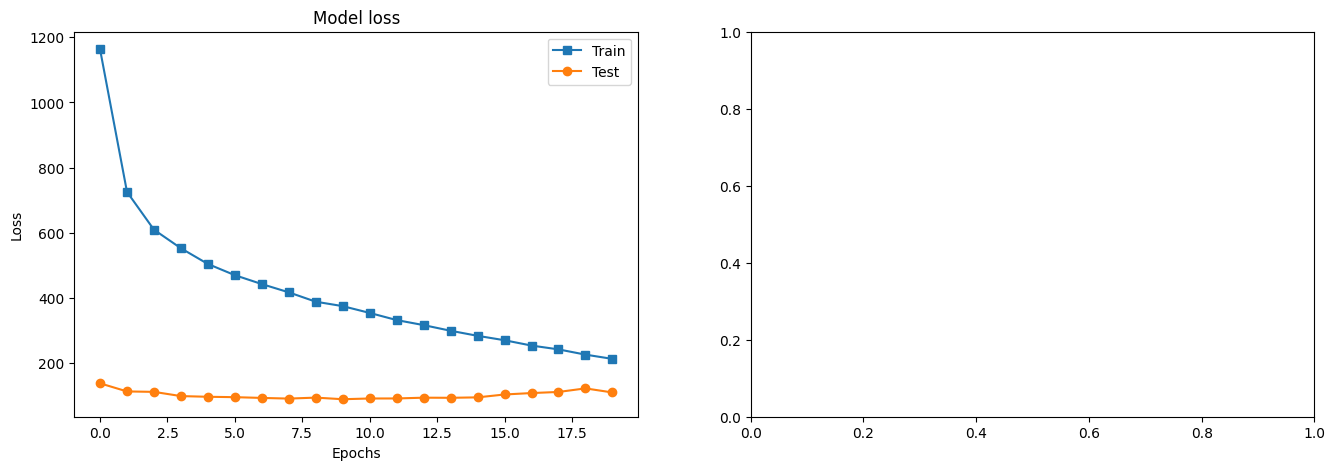

In [82]:
#start the training and validation loop
epochs = 20
cnn_model = CNN_Model()
#Initialize Optimizer and Loss function
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.001)
train_loss_arr = []
valid_loss_ar = []
for e in range(epochs):
  train_loss, _ = cnn_model_train(train_dataloader, cnn_model, loss_func, optimizer)
  valid_loss, _ = cnn_model_test(test_dataloader, cnn_model, loss_func)
  train_loss_arr.append(train_loss)
  valid_loss_ar.append(valid_loss)
plot_losses(train_loss_arr, valid_loss_ar)



### d. After extracting feature from CNN model use MLP for classification (15 Marks)

In [63]:
print(train_loss_arr, valid_loss_ar)

[944.0827988497913, 583.9280931390822, 506.31843541935086, 454.36409472860396, 411.74692314863205] [118.3339802660048, 96.27015553414822, 88.80176932364702, 78.62263197079301, 80.59887031652033]
